<a href="https://colab.research.google.com/github/DiegoPincheiraIb/EL4106_Assignments/blob/main/Assignment1/Assignment1_EL4106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración del entorno de ejecución

## Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
from google.colab import files
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## P2: Carga de datos

Se carga el archivo "HTRU_2.csv", el cual consta de 8 características obtenidas analizado señales de radiotelescopios, en conjunto con un indicador que cataloga si la clase de la muestra es uno (pulsar), o cero (no-pulsar).

In [2]:
##### -------- P2 -------
uploaded = files.upload()
datos = pd.read_csv("HTRU_2.csv",names=['mean_prof','std_prof','exkurt_prof','skew_prof','mean_curve','std_curve','exkurt_curve','skew_curve','Class'])

Saving HTRU_2.csv to HTRU_2.csv


In [3]:
datos.head()

,mean_prof,std_prof,exkurt_prof,skew_prof,mean_curve,std_curve,exkurt_curve,skew_curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## P3: Separación de datos

Se separan los datos en un diccionario cuyas llaves son las clases de los datos (pulsar con Class = 1 y no pulsar con Class = 0), y sus valores son un dataframe con todos los elementos correspondientes a las clases determinadas.

In [4]:
dict_datos = {
    "pulsar": datos.loc[datos['Class'] == 1], 
    "no pulsar": datos.loc[datos['Class'] == 0]
    }

print('Los datos correspondientes a la clase "pulsar" son los siguientes:')
print(dict_datos["pulsar"].head())
print('Los datos correspondientes a la clase  "no pulsar" son los siguientes:')
print(dict_datos["no pulsar"].head())

Los datos correspondientes a la clase "pulsar" son los siguientes:
     mean_prof   std_prof  exkurt_prof  skew_prof  mean_curve  std_curve  exkurt_curve  skew_curve  Class
19   99.367188  41.572202     1.547197   4.154106   27.555184  61.719016      2.208808    3.662680      1
42  120.554688  45.549905     0.282924   0.419909    1.358696  13.079034     13.312141  212.597029      1
61   27.765625  28.666042     5.770087  37.419009   73.112876  62.070220      1.268206    1.082920      1
92   23.625000  29.948654     5.688038  35.987172  146.568562  82.394624     -0.274902   -1.121848      1
93   94.585938  35.779823     1.187309   3.687469    6.071070  29.760400      5.318767   28.698048      1
Los datos correspondientes a la clase  "no pulsar" son los siguientes:
    mean_prof   std_prof  exkurt_prof  skew_prof  mean_curve  std_curve  exkurt_curve  skew_curve  Class
0  140.562500  55.683782    -0.234571  -0.699648    3.199833  19.110426      7.975532   74.242225      0
1  102.507812  5

## P4: Plotteo de histogramas

Se generan histogramas superpuestos para los datos de la clase negativa (no pulsar) y clase positiva (pulsar). Se recomienda utilizar plt.hist() con alpha=0.8

In [116]:
kwargs = dict(histtype='stepfilled',alpha=0.8, bins=20, density = True, stacked = True) # Parámetros de la función plt.hist()

In [117]:
def Histogramas(dict_obj, cat_obj, kwargs_obj):
  """ Dado un diccionario objetivo con los datos divididos entre clases en sus llaves,
  una característica objetivo y un listado de argumentos para la función plt.hist(), 
  realiza un plot de histogramas superpuestos tanto para la clase positiva como
  la clase negativa."""
  print('El histograma para la característica '+ cat_obj + ' es la siguiente:')
  plt.hist(dict_obj["no pulsar"][cat_obj],label='datos no pulsar', **kwargs)
  plt.hist(dict_obj["pulsar"][cat_obj],label='datos pulsar', **kwargs)
  plt.legend(loc='best')
  plt.title('Histograma de la característica ' +  cat_obj)
  plt.show()

El histograma para la característica mean_prof es la siguiente:


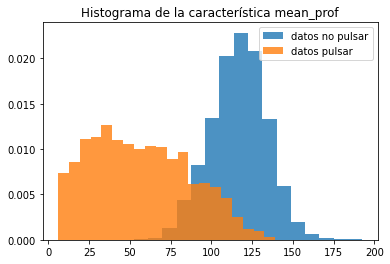

El histograma para la característica std_prof es la siguiente:


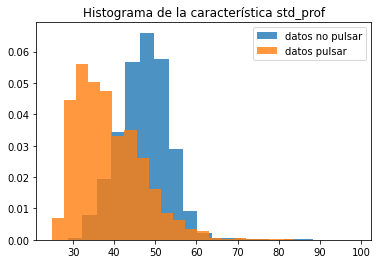

El histograma para la característica exkurt_prof es la siguiente:


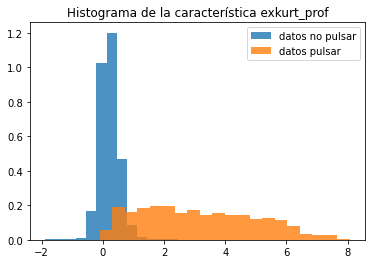

El histograma para la característica skew_prof es la siguiente:


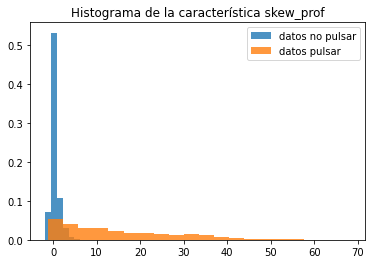

El histograma para la característica mean_curve es la siguiente:


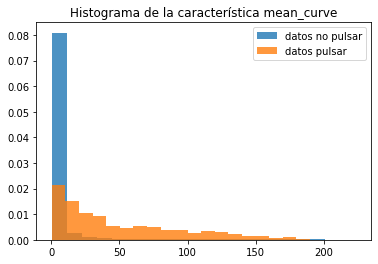

El histograma para la característica std_curve es la siguiente:


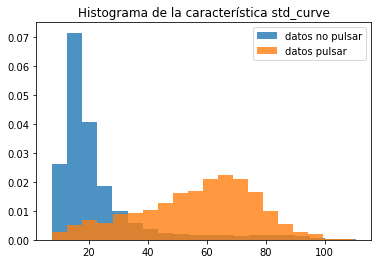

El histograma para la característica exkurt_curve es la siguiente:


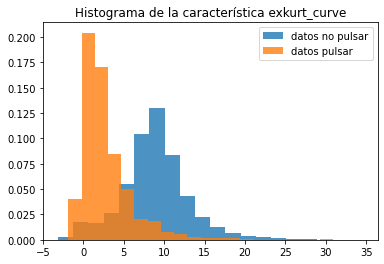

El histograma para la característica skew_curve es la siguiente:


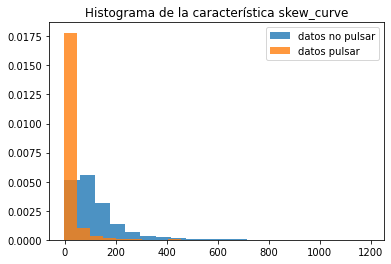

In [118]:
# Se itera sobre todas las características de la base de datos (Mean_prof, Std_prof, ...)
for i in dict_datos['pulsar'].iloc[:,:-1]:
  Histogramas(dict_datos, i, kwargs)

## P5: Skewness & Kurtosis

Se calcula el skewness y kurtosis de los datos tanto para la clase positiva como para la clase negativa.

### Skewness

In [10]:
dict_skewness = {key: dict_datos[key].skew() for key in dict_datos}


print('Skewness de los datos pulsar:')
print(dict_skewness["pulsar"])
print('Skewness de los datos no pulsar:')
print(dict_skewness["no pulsar"])
print ('---------------------------------')

Skewness de los datos pulsar:
mean_prof       0.308597
std_prof        1.036542
exkurt_prof     0.306437
skew_prof       0.942712
mean_curve      0.963258
std_curve      -0.363589
exkurt_curve    2.271182
skew_curve      8.115754
Class           0.000000
dtype: float64
Skewness de los datos no pulsar:
mean_prof      -0.104386
std_prof        0.427126
exkurt_prof     0.971401
skew_prof       4.545891
mean_curve      5.038468
std_curve       2.581859
exkurt_curve    0.534252
skew_curve      2.767688
Class           0.000000
dtype: float64
---------------------------------


### Kurtosis

In [11]:
### -------- Kurtosis -------
dict_kurtosis = {key: dict_datos[key].kurtosis() for key in dict_datos}
print('Kurtosis de los datos pulsar:')
print(dict_kurtosis["pulsar"])
print('Kurtosis de los datos no pulsar:')
print(dict_kurtosis["no pulsar"])
print ('---------------------------------')

Kurtosis de los datos pulsar:
mean_prof        -0.808386
std_prof          1.661709
exkurt_prof      -0.880170
skew_prof         0.182500
mean_curve       -0.053478
std_curve        -0.464914
exkurt_curve      8.627646
skew_curve      110.558305
Class             0.000000
dtype: float64
Kurtosis de los datos no pulsar:
mean_prof        0.366312
std_prof         2.353630
exkurt_prof     11.377569
skew_prof       59.247420
mean_curve      27.204574
std_curve        6.746908
exkurt_curve     2.260259
skew_curve      13.630239
Class            0.000000
dtype: float64
---------------------------------


## P7 & P8: Matriz de Correlación

Se elabora una función que, dado un dataframe, calcule la correlación con respecto a sí misma.

### Función de matriz de correlación

Para calcular la matriz de correlación, se elabora una función que calcula la matriz de covarianza de un dataframe objetivo. Con dicha matriz, se calcula la matriz de correlación.

In [12]:
def Covariance_Mtx(df_obj):
  """ Dado un dataframe objetivo, calcula la matriz de covarianza entre la misma 
  matriz. Para ello:
  1. Se extrae la media de cada una de sus columnas y se resta a las columnas
  correspondientes.
  2. Se multiplica esta matriz por su traspuesta.
  3. Se divide cada elemento de la matriz resultante por el total de datos, 
  obteniendo así la Matriz de Covarianza de los datos."""
  mtx_aux = df_obj.sub(df_obj.mean(), axis = 'columns')
  mtx_aux_dot = mtx_aux.transpose().dot(mtx_aux)
  return mtx_aux_dot/(len(df_obj)-1)

In [13]:
def Corr_Mtx(df_obj):
  """ Dado un dataframe objetivo, calcula la matriz de correlación entre la misma 
  matriz. Para ello:
  1. Calcula la matriz de covarianza del dataframe objetivo.
  2. Calcula la desviación estandar de los datos.
  3. Divide dos veces por la desviación estandar del dataframe objetivo.
  Finalmente retorna la matriz de correlación de los datos."""
  cov_mtx_obj = Covariance_Mtx(df_obj)
  std_datos = df_obj.std()
  corr_mtx_obj = (cov_mtx_obj/std_datos).divide(std_datos, axis='rows')
  return corr_mtx_obj

### Implementación de la función anterior

In [14]:
##### -------- P8 -------
print('Matriz de Correlacion:')
print(Corr_Mtx(datos))

Correlacion = datos.corr()

print('Matriz de Correlacion mediante funcion integrada en Pandas:')
print(Correlacion)


Matriz de Correlacion:
              mean_prof  std_prof  exkurt_prof  skew_prof  mean_curve  std_curve  exkurt_curve  skew_curve     Class
mean_prof      1.000000  0.547137    -0.873898  -0.738775   -0.298841  -0.307016      0.234331    0.144033 -0.673181
std_prof       0.547137  1.000000    -0.521435  -0.539793    0.006869  -0.047632      0.029429    0.027691 -0.363708
exkurt_prof   -0.873898 -0.521435     1.000000   0.945729    0.414368   0.432880     -0.341209   -0.214491  0.791591
skew_prof     -0.738775 -0.539793     0.945729   1.000000    0.412056   0.415140     -0.328843   -0.204782  0.709528
mean_curve    -0.298841  0.006869     0.414368   0.412056    1.000000   0.796555     -0.615971   -0.354269  0.400876
std_curve     -0.307016 -0.047632     0.432880   0.415140    0.796555   1.000000     -0.809786   -0.575800  0.491535
exkurt_curve   0.234331  0.029429    -0.341209  -0.328843   -0.615971  -0.809786      1.000000    0.923743 -0.390816
skew_curve     0.144033  0.027691    -0.2

## P9 - 13: Características y su correlación

### P9: Características y la correlación con la clase

Se elabora una función que arroja los valores de la correlación con la clase, ordenados estos de mayor a menor valor absoluto de coeficiente de correlación.

In [38]:
##### -------- P9  -------

def Elem_Correlax(datox:pd.DataFrame, columna: str):
  """ Dado una matriz de correlación en forma de dataframe y el nombre de una 
  columna (característica o clase) de dicha matriz, se imprime en pantalla las 
  características más correlacionadas con dicha columna ordenadas de mayor a menor
  correlación en términos de valor absoluto."""
  dato = copy.deepcopy(datox[[columna]])
  dato.sort_values(by = columna,inplace=True, ascending = False, key=abs)
  newdato = copy.deepcopy(dato.drop(columna))
  print('Las caracteristicas más correlacionadas con ' + columna + ' se presentan a continuación,')
  print('junto con sus correspondientes coeficientes de correlación:')
  print(newdato)

In [39]:
Elem_Correlax(Corr_Mtx(datos),'Class')

Las caracteristicas más correlacionadas con Class se presentan a continuación,
junto con sus correspondientes coeficientes de correlación:
                 Class
exkurt_prof   0.791591
skew_prof     0.709528
mean_prof    -0.673181
std_curve     0.491535
mean_curve    0.400876
exkurt_curve -0.390816
std_prof     -0.363708
skew_curve   -0.259117


### P10 & P12: Pares de características más/menos correlacionados

Se elabora una función que entrega los cinco pares de elementos con mayor correlación, y los cinco pares de elementos con menor correlación.

In [114]:
def Ordenador_Corr(MatrizCorrelacion):
  MatrizObj = copy.deepcopy(MatrizCorrelacion)
  MatrizMasking = MatrizObj.mask(np.tril(np.ones(MatrizObj.shape)).astype(np.bool))
  df_obj = pd.DataFrame(columns = ['Caract.1', 'Caract.2', 'Valor Corr.'])
  for i in MatrizCorrelacion:
    aux_df = MatrizMasking[i].dropna()
    df_obj = df_obj.append((pd.DataFrame({'Caract.1': [aux_df.name] * len(aux_df), 'Caract.2': aux_df.index.tolist(), 'Valor Corr.': aux_df.values})))
  df_obj.sort_values(by = 'Valor Corr.',inplace=True, ascending = False, key=abs)
  df_obj.reset_index(drop = True, inplace = True)
  print('Se tiene a continuación los primeros cinco elementos con mayor correlación \nen términos de valor absoluto: ')
  print(df_obj.iloc[0:5, :],'\n')
  print('Se tiene a continuación los primeros cinco elementos con menor correlación \nen términos de valor absoluto: ')
  print(df_obj.iloc[-5:, :])
  return df_obj


In [115]:
corr_ordenada = Ordenador_Corr(Corr_Mtx(datos))

Se tiene a continuación los primeros cinco elementos con mayor correlación 
en términos de valor absoluto: 
       Caract.1      Caract.2  Valor Corr.
0     skew_prof   exkurt_prof     0.945729
1    skew_curve  exkurt_curve     0.923743
2   exkurt_prof     mean_prof    -0.873898
3  exkurt_curve     std_curve    -0.809786
4     std_curve    mean_curve     0.796555 

Se tiene a continuación los primeros cinco elementos con menor correlación 
en términos de valor absoluto: 
        Caract.1   Caract.2  Valor Corr.
31    skew_curve  mean_prof     0.144033
32     std_curve   std_prof    -0.047632
33  exkurt_curve   std_prof     0.029429
34    skew_curve   std_prof     0.027691
35    mean_curve   std_prof     0.006869


### P11 & P13: Gráfico de características con mayor/menor correlación

Se grafican los pares de características con la máxima correlación, y los pares de características con la mínima correlación.

#### P11: Máxima correlación

Text(0, 0.5, 'exkurt_prof')

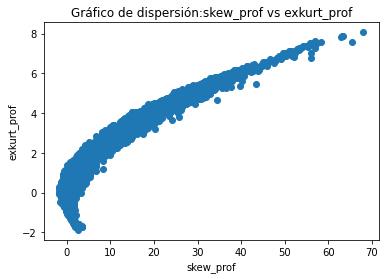

In [110]:
fig = plt.scatter(datos[corr_ordenada.iloc[0]['Caract.1']],datos[corr_ordenada.iloc[0]['Caract.2']])
plt.title('Gráfico de dispersión:' + corr_ordenada.iloc[0]['Caract.1'] +  ' vs ' + corr_ordenada.iloc[0]['Caract.2'],)
plt.xlabel(corr_ordenada.iloc[0]['Caract.1'])
plt.ylabel(corr_ordenada.iloc[0]['Caract.2'])

#### P13: Mínima correlación

Text(0, 0.5, 'std_prof')

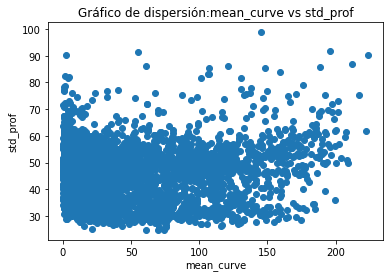

In [111]:
fig = plt.scatter(datos[corr_ordenada.iloc[-1]['Caract.1']],datos[corr_ordenada.iloc[-1]['Caract.2']])
plt.title('Gráfico de dispersión:' + corr_ordenada.iloc[-1]['Caract.1'] +  ' vs ' + corr_ordenada.iloc[-1]['Caract.2'],)
plt.xlabel(corr_ordenada.iloc[-1]['Caract.1'])
plt.ylabel(corr_ordenada.iloc[-1]['Caract.2'])